In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import re

/var/folders/h0/z8rnyvyx1454wmdznbvh69fh0000gn/T/ipykernel_8147/631478308.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
epidu = pd.read_csv("../Hemorrhage Segmentation Project/Results_Epidural Hemorrhage Detection_2020-11-16_21.31.26.148.csv")
Intra = pd.read_csv("../Hemorrhage Segmentation Project/Results_Intraparenchymal Hemorrhage Detection_2020-11-16_21.39.31.268.csv")
Multiple = pd.read_csv("../Hemorrhage Segmentation Project/Results_Multiple Hemorrhage Detection_2020-11-16_21.36.24.018.csv")
Subara = pd.read_csv("../Hemorrhage Segmentation Project/Results_Subarachnoid Hemorrhage Detection_2020-11-16_21.36.18.668.csv")
Subdu1 = pd.read_csv("../Hemorrhage Segmentation Project/Results_Subdural Hemorrhage Detection_2020-11-16_21.35.48.040.csv")
Subdu2 = pd.read_csv("../Hemorrhage Segmentation Project/Results_Subdural Hemorrhage Detection_2020-11-16_21.37.19.745.csv")

In [4]:
epidu[['Origin','Majority Label','Correct Label']]


,Origin,Majority Label,Correct Label
0,ID_004c4b319.jpg,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0....","[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0..."
1,ID_0237b835f.jpg,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",NaN
2,ID_02e2d273d.jpg,"[{""x"": 0.46484375, ""y"": 0.357421875}, {""x"": 0....","[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0..."
3,ID_02f37ce84.jpg,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",NaN
4,ID_02f37ce84.jpg,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",NaN
...,...,...,...
605,ID_879afbc77.jpg,[],NaN
606,ID_af76460ee.jpg,[],NaN
607,ID_d6d369eaa.jpg,[],NaN
608,ID_d9bfa60ed.jpg,[],"[[{'x': 0.443359375, 'y': 0.810546875}, {'x': ..."


In [5]:
ALL=pd.concat([epidu,Intra,Multiple,Subara,Subdu1,Subdu2])

In [6]:
wrong_w=['[]','[[],[]]','[[]]','[[], []]']
for i in wrong_w:
    ALL=ALL.replace(to_replace= i, value=np.nan)

row_indexs=ALL[(ALL['Correct Label'].isnull())&(ALL['Majority Label'].isnull())].index
All=ALL.drop(row_indexs)

ind= All.index.to_list()
ind1=All[All['Correct Label'].isnull()]['Majority Label'].index.tolist()

All['Final Label']=''
for i in ind:
    if i in ind1:
       All['Final Label'][i]= All['Majority Label'][i]
    else:
       All['Final Label'][i]= All['Correct Label'][i]

/var/folders/h0/z8rnyvyx1454wmdznbvh69fh0000gn/T/ipykernel_8147/2114451167.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  All['Final Label'][i]= All['Majority Label'][i]
/var/folders/h0/z8rnyvyx1454wmdznbvh69fh0000gn/T/ipykernel_8147/2

In [7]:
All['Final Label']

0      [{"x": 0.537109375, "y": 0.89453125}, {"x": 0....
1      [{"x": 0.654296875, "y": 0.724609375}, {"x": 0...
2      [{"x": 0.46484375, "y": 0.357421875}, {"x": 0....
3      [{"x": 0.431640625, "y": 0.607421875}, {"x": 0...
4      [{"x": 0.353515625, "y": 0.59765625}, {"x": 0....
                             ...                        
738    [[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...
739    [{"x": 0.630859375, "y": 0.24609375}, {"x": 0....
740    [{"x": 0.70703125, "y": 0.67578125}, {"x": 0.7...
741                                                  NaN
743                                                  NaN
Name: Final Label, Length: 5251, dtype: object

In [8]:
row_indexs1=All[(All['Final Label'].isnull())].index
AL=All.drop(row_indexs1)
AL

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes,Final Label
0,1196514,ID_004c4b319.jpg,https://go.centaurlabs.com/problem/1196514,Labeled,"['[{""x"": 0.40818718, ""y"": 0.8623607}, {""x"": 0....",19.0,5.0,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0....",1.0,"[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0...",0.00,0.968851,NaN,NaN,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0...."
1,1196682,ID_0237b835f.jpg,https://go.centaurlabs.com/problem/1196682,Ready,"['[{""x"": 0.62959146, ""y"": 0.720186}, {""x"": 0.6...",51.0,28.0,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",1.0,NaN,NaN,0.063519,NaN,NaN,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0..."
2,1196477,ID_02e2d273d.jpg,https://go.centaurlabs.com/problem/1196477,Labeled,"['[{""x"": 0.35205495, ""y"": 0.34680602}, {""x"": 0...",22.0,6.0,"[{""x"": 0.46484375, ""y"": 0.357421875}, {""x"": 0....",1.0,"[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0...",0.06,0.710300,NaN,NaN,"[{""x"": 0.46484375, ""y"": 0.357421875}, {""x"": 0...."
3,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",2.0,NaN,NaN,0.264134,NaN,NaN,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0..."
4,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",2.0,NaN,NaN,0.264134,NaN,NaN,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,1198300,ID_fef30f0b4.jpg,https://go.centaurlabs.com/problem/1198300,Labeled,"['[{""x"": 0.5635891, ""y"": 0.6987898}, {""x"": 0.5...",11.0,5.0,"[{""x"": 0.62890625, ""y"": 0.861328125}, {""x"": 0....",1.0,"[[{'x': 0.630859375, 'y': 0.85546875}, {'x': 0...",0.04,0.724464,NaN,NaN,"[{""x"": 0.62890625, ""y"": 0.861328125}, {""x"": 0...."
737,1198392,ID_ff1e93267.jpg,https://go.centaurlabs.com/problem/1198392,Labeled,"['[{""x"": 0.25159726, ""y"": 0.24648584}, {""x"": 0...",19.0,5.0,"[{""x"": 0.474609375, ""y"": 0.8046875}, {""x"": 0.4...",3.0,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",0.48,0.607623,NaN,NaN,"[{""x"": 0.474609375, ""y"": 0.8046875}, {""x"": 0.4..."
738,1198392,ID_ff1e93267.jpg,https://go.centaurlabs.com/problem/1198392,Labeled,"['[{""x"": 0.25159726, ""y"": 0.24648584}, {""x"": 0...",19.0,5.0,"[{""x"": 0.68359375, ""y"": 0.42578125}, {""x"": 0.6...",3.0,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",0.48,0.607623,NaN,NaN,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0..."
739,1198392,ID_ff1e93267.jpg,https://go.centaurlabs.com/problem/1198392,Labeled,"['[{""x"": 0.25159726, ""y"": 0.24648584}, {""x"": 0...",19.0,5.0,"[{""x"": 0.630859375, ""y"": 0.24609375}, {""x"": 0....",3.0,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",0.48,0.607623,NaN,NaN,"[{""x"": 0.630859375, ""y"": 0.24609375}, {""x"": 0...."


In [9]:
#df_merge = AL['Final Label'].groupby(AL['Origin']).sum()
df_merge2 = AL.groupby(AL['Origin']).agg(Label=("Final Label", lambda x : ";".join(x.unique())))
df= pd.DataFrame(df_merge2)
name2=df_merge2.index
name3=name2.to_list()
df

,Label
Origin,
ID_0002081b6.jpg,"[{""x"": 0.3046875, ""y"": 0.484375}, {""x"": 0.3046..."
ID_001b1b944.jpg,"[{""x"": 0.314453125, ""y"": 0.75}, {""x"": 0.314453..."
ID_0048e60a4.jpg,"[{""x"": 0.5859375, ""y"": 0.640625}, {""x"": 0.5859..."
ID_004c4b319.jpg,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0...."
ID_0057d2736.jpg,"[{""x"": 0.3046875, ""y"": 0.521484375}, {""x"": 0.3..."
...,...
ID_ffb8b3408.jpg,"[{""x"": 0.44921875, ""y"": 0.748046875}, {""x"": 0...."
ID_ffc54be74.jpg,"[[{'x': 0.287109375, 'y': 0.443359375}, {'x': ..."
ID_ffd581895.jpg,"[[{'x': 0.3671875, 'y': 0.666015625}, {'x': 0...."


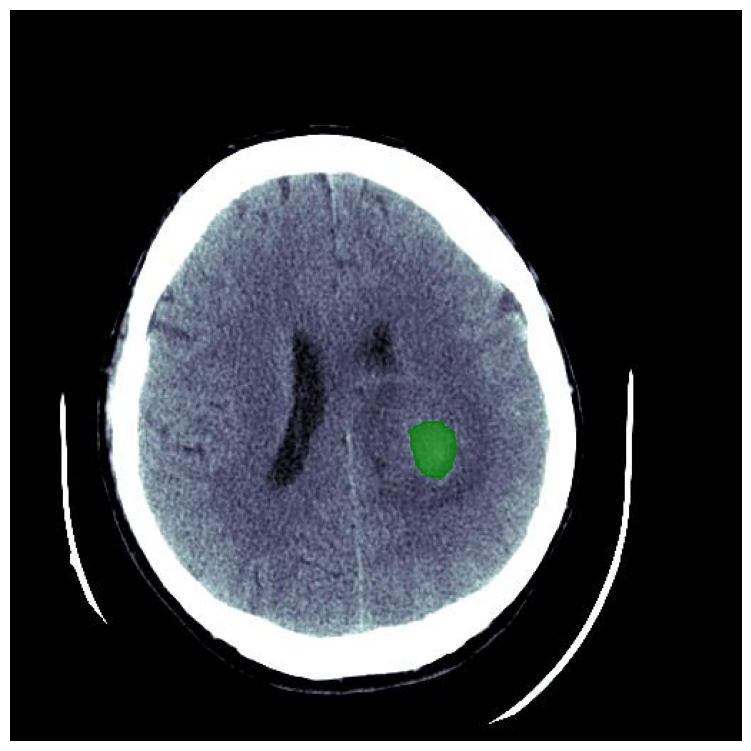

In [10]:
#plot boundary sample
al = df.iloc[2]
a=re.split(r'(?:[;])', al['Label'])
b=len(a)

for u in range(b):
       try:
        S_label = eval(a[u])
        image_sample = matplotlib.image.imread("../renders/brain_window_all/"+str(name3[2]))
        plt.imshow(image_sample)

        x = [valx['x'] for valx in S_label]
        y = [valy['y'] for valy in S_label]
        X = [x * 512 for x in x]
        Y = [y * 512 for y in y]
        plt.plot(X, Y, color="green",alpha=0.7)
        plt.fill(X, Y,'green',alpha=0.7)

       except TypeError:
           pass
       continue

plt.axis('off')
plt.gcf().set_size_inches(512 / 70 , 512 / 70 )
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
Name=str(name3[2])
#plt.savefig('E:\\Machine learning\\bw\\squares1.png', pad_inches = 1,transparent = True,facecolor ='g',orientation ='landscape')
plt.savefig("E:\\Machine learning\\"+str(name3[2]))
plt.show()

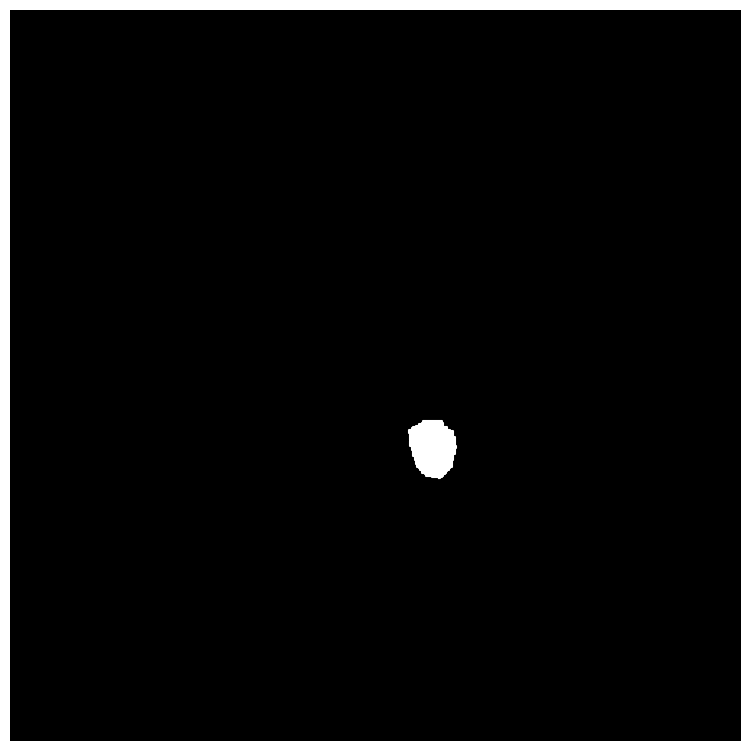

In [11]:
#mask sample
al = df.iloc[2]
a=re.split(r'(?:[;])', al['Label'])
b=len(a)

for u in range(b):
       try:
        S_label = eval(a[u])
        image_sample = matplotlib.image.imread("../renders/brain_window_all/"+str(name3[2]))
        plt.imshow(image_sample)
        X0 = [0,512,512,0]
        Y0 = [0,0,512,512]
        plt.plot(X0, Y0, color="Black")
        plt.fill(X0, Y0,'black',alpha=1)

        x = [valx['x'] for valx in S_label]
        y = [valy['y'] for valy in S_label]
        X = [x * 512 for x in x]
        Y = [y * 512 for y in y]
        plt.plot(X, Y, color="white")
        plt.fill(X, Y,'white',alpha=1)

       except TypeError:
           pass
       continue

plt.axis('off')
plt.gcf().set_size_inches(512 / 70 , 512 / 70 )
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
Name=str(name3[2])
#plt.savefig('E:\\Machine learning\\bw\\squares1.png', pad_inches = 1,transparent = True,facecolor ='g',orientation ='landscape')
plt.savefig("../renders/"+Name[0:-4]+".png")
plt.show()

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import matplotlib.image

# 确保结果文件夹存在
results_dir = "../renders/results"
os.makedirs(results_dir, exist_ok=True)

# 遍历df中的每一行
for i in range(len(df)):
    al = df.iloc[i]
    a = re.split(r'(?:[;])', al['Label'])
    b = len(a)
    wrong_list = []

    # 预设图像文件名
    image_name = str(name3[i])
    image_path = f"../renders/brain_window_all/{image_name}"
    save_path = f"{results_dir}/{image_name}"

    # 尝试绘制每个标签的边界
    try:
        for u in range(b):
            S_label = eval(a[u])
            x = [val['x'] for val in S_label]
            y = [val['y'] for val in S_label]
            X = [x * 512 for x in x]
            Y = [y * 512 for y in y]
            image_sample = matplotlib.image.imread(image_path)

            plt.figure()
            plt.imshow(image_sample)
            plt.plot(X, Y, color="green", alpha=0.7)
            plt.fill(X, Y, 'g', alpha=0.7)
            plt.axis('off')
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
            plt.margins(0, 0)

            # 保存图像到文件
            plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
            plt.close()  # 关闭绘图对象，防止内存泄露
    except Exception as e:
        print(f"Error processing {image_name}: {e}")
        wrong_list.append(image_name)
        continue  # 继续处理下一个图像


Error processing ID_013745bfa.jpg: list indices must be integers or slices, not str
Error processing ID_01397632b.jpg: list indices must be integers or slices, not str
Error processing ID_0162f0acb.jpg: list indices must be integers or slices, not str
Error processing ID_03d9d46c6.jpg: list indices must be integers or slices, not str
Error processing ID_046c7006f.jpg: list indices must be integers or slices, not str
Error processing ID_053172482.jpg: list indices must be integers or slices, not str
Error processing ID_05e64e792.jpg: list indices must be integers or slices, not str
Error processing ID_066fd81f3.jpg: list indices must be integers or slices, not str
Error processing ID_0792a39a7.jpg: list indices must be integers or slices, not str
Error processing ID_090dcc04e.jpg: list indices must be integers or slices, not str
Error processing ID_093b4263e.jpg: list indices must be integers or slices, not str
Error processing ID_0961c4334.jpg: list indices must be integers or slices, 

In [7]:
import os
import shutil

# 文件路径
image_dir = '../renders/brain_window_all/'
mask_dir = '../renders/results/'
correct_image_dir = '../renders/correct/'

# 确保正确的图像文件夹存在
os.makedirs(correct_image_dir, exist_ok=True)

# 获取掩码和图像的文件名
mask_files = {os.path.splitext(f)[0]: os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.jpg')}
image_files = {os.path.splitext(f)[0]: os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')}

# 复制匹配的图像文件到新的文件夹
for mask_name, mask_path in mask_files.items():
    if mask_name in image_files:
        # 如果存在对应的图像文件，复制到新文件夹
        shutil.copy(image_files[mask_name], correct_image_dir)
        print(f"Copied {image_files[mask_name]} to {correct_image_dir}")
    else:
        print(f"No matching image found for mask {mask_path}")

print("Completed copying matched images.")


Copied ../renders/brain_window_all/ID_c4903fb40.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_6e3cea4c4.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_15b8dc538.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_66bf3f415.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_e503cb2c7.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_2b8c34d53.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_4ca682957.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_981fd17f6.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_31f48511a.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_869356e3e.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_6d1f67cb3.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_9461f2552.jpg to ../renders/correct/
Copied ../renders/brain_window_all/ID_d858869a1.jpg to ../renders/correct/
Copied ../renders/brain_w

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# 用于存储图像和掩码的路径
image_dir = '../renders/correct/'
mask_dir = '../renders/results/'

# 获取图像和掩码文件名列表
image_files = [os.path.join(image_dir, x) for x in os.listdir(image_dir) if x.endswith('.jpg')]
mask_files = [os.path.join(mask_dir, x) for x in os.listdir(mask_dir) if x.endswith('.jpg')]

# 加载图像和掩码，并进行预处理
def load_and_preprocess_image(path, scale=255.0):
    img = load_img(path, target_size=(128, 128), color_mode='grayscale')
    img = img_to_array(img) / scale
    return img

# 创建图像和掩码的数组
images = np.array([load_and_preprocess_image(x) for x in image_files])
masks = np.array([load_and_preprocess_image(x, scale=1.0) for x in mask_files])

# 检查图像和掩码的形状
print('Images shape:', images.shape)
print('Masks shape:', masks.shape)


Images shape: (2549, 128, 128, 1)
Masks shape: (2549, 128, 128, 1)


In [19]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 图像加载和预处理（保持不变）
def load_and_preprocess_image(path):
    img = load_img(path, target_size=(128, 128), color_mode='grayscale')
    img = img_to_array(img) / 255.0  # 确保图像也是归一化的
    return img

# 更新后的掩码加载和预处理
def load_and_preprocess_mask(path):
    img = load_img(path, target_size=(128, 128), color_mode='grayscale')
    img = img_to_array(img)
    img = np.where(img > 0, 1, 0).astype(np.float32)  # 二值化处理
    return img

# 使用上述函数重新加载数据
image_files = sorted([os.path.join(image_dir, x) for x in os.listdir(image_dir) if x.endswith('.jpg')])
mask_files = sorted([os.path.join(mask_dir, x) for x in os.listdir(mask_dir) if x.endswith('.jpg')])

images = np.array([load_and_preprocess_image(x) for x in image_files])
masks = np.array([load_and_preprocess_mask(x) for x in mask_files])

# 确保文件名匹配
assert len(image_files) == len(mask_files) and all(os.path.basename(img) == os.path.basename(mask) for img, mask in zip(image_files, mask_files)), "图像和掩码文件不匹配"


# 检查图像和掩码的形状
print('Images shape:', images.shape)
print('Masks shape:', masks.shape)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout


def unet(input_size=(128, 128, 1)):
    inputs = Input(input_size)
    # Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    # Bottom
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(p1)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    # Expansion path
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c1])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c6)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# 创建模型
model = unet()
model.summary()

Images shape: (2549, 128, 128, 1)
Masks shape: (2549, 128, 128, 1)
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_28 (Conv2D)          (None, 128, 128, 16)         160       ['input_5[0][0]']             
                                                                                                  
 dropout_12 (Dropout)        (None, 128, 128, 16)         0         ['conv2d_28[0][0]']           
                                                                                                  
 conv2d_29 (Conv2D)          (None, 128, 128, 16)         2320      ['dropout_12[0][0]']          
                         

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 设置回调函数
checkpoint = ModelCheckpoint('unet_brain_seg.h5', verbose=1, save_best_only=True)
earlystopping = EarlyStopping(patience=10, verbose=1)

# 训练模型
history = model.fit(images, masks, batch_size=32, epochs=10, validation_split=0.1, callbacks=[checkpoint, earlystopping])

Epoch 1/10
72/72 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.9431
Epoch 1: val_loss improved from inf to 0.06401, saving model to unet_brain_seg.h5
72/72 [==============================] - 40s 552ms/step - loss: 0.1601 - accuracy: 0.9431 - val_loss: 0.0640 - val_accuracy: 0.9723
Epoch 2/10
72/72 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9722
Epoch 2: val_loss improved from 0.06401 to 0.05835, saving model to unet_brain_seg.h5
72/72 [==============================] - 39s 545ms/step - loss: 0.0633 - accuracy: 0.9722 - val_loss: 0.0584 - val_accuracy: 0.9743
Epoch 3/10
72/72 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9738
Epoch 3: val_loss improved from 0.05835 to 0.05601, saving model to unet_brain_seg.h5
72/72 [==============================] - 39s 545ms/step - loss: 0.0593 - accuracy: 0.9738 - val_loss: 0.0560 - val_accuracy: 0.9751
Epoch 4/10
72/72 [==============================] - ETA: 0s - loss: 

In [18]:
print("图像数据统计：")
print("最小值：", np.min(images))
print("最大值：", np.max(images))
print("平均值：", np.mean(images))

print("掩码数据统计：")
print("最小值：", np.min(masks))
print("最大值：", np.max(masks))
print("平均值：", np.mean(masks))
print("唯一值：", np.unique(masks))

图像数据统计：
最小值： 0.0
最大值： 1.0
平均值： 0.17585427
掩码数据统计：
最小值： 0.0
最大值： 255.0
平均值： 44.23455
唯一值： [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179